# Classification Problem

Predicting the optimum number of clusters and representing it visually

Attribute Information:
To construct the data, seven geometric parameters of Flower kernels were measured:
1.SepalLengthCm 2.SepalWidthCm 3.PetalLengthCm 4.PetalWidthCm 5.Species

## Solution Approach:


### STEP 1:

##### Load the dataset

In [203]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [204]:
dataset = pd.read_csv('C:\\Users\\Tejasvi Jain\\Desktop\\Iris.csv',index_col='Id')

### STEP 2:


##### Display the DataFrame to inspect the data

In [205]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


##### Exploring the data


In [206]:
dataset.shape

(150, 5)

In [207]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [209]:
dataset.info

<bound method DataFrame.info of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
5              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3.0

### Step 3:

##### Checking for any relationship between the data

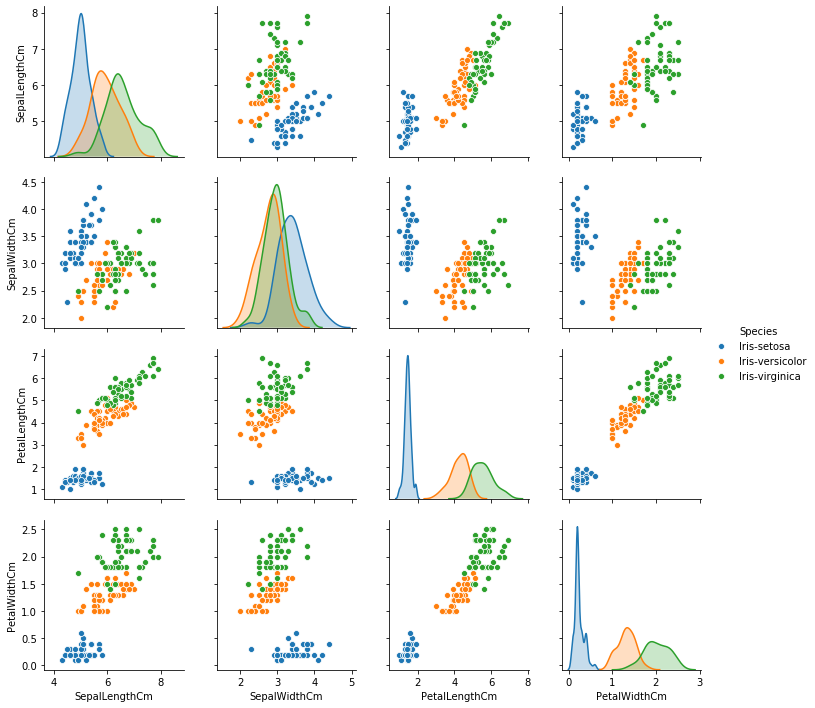

In [210]:
sns.pairplot(dataset, hue='Species')

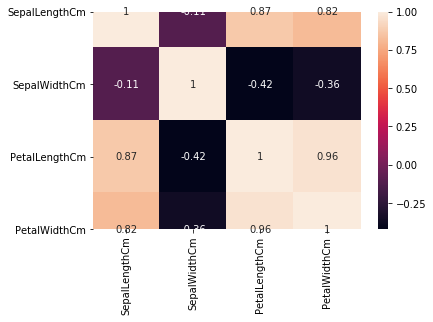

In [212]:
sns.heatmap(dataset.corr(),annot=True)

### Step 4:

### Elbow Method - To find optimal number of clusters for K-means

##### Measure the quality of clusterings with different numbers of clusters using the inertia. For each of the given values of k, perform the following steps:


In [222]:
from sklearn.cluster import KMeans

In [234]:
X=dataset.iloc[:,[0,1,2,3]].values

In [224]:
inertias = []

for clusters in range(1,15):
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=clusters,init='k-means++')

    # Fit model to samples
    kmeans.fit(X)

    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)

### Step 5:


##### Plot the inertia to see which number of clusters is best.


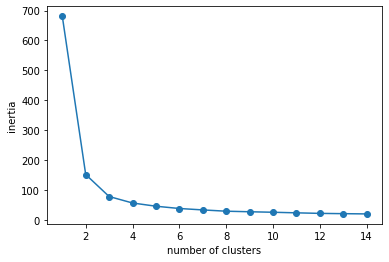

In [225]:
plt.plot(range(1,15), inertias, '-o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

#### You can see from the graph that 3 is a good number of clusters, since these are points where the elbow begins

### Step 6:

### Training the model

In [231]:
model = KMeans(n_clusters=3)

In [232]:
labels = model.fit_predict(X)


### Step 7:

### Visualisation of Clusters

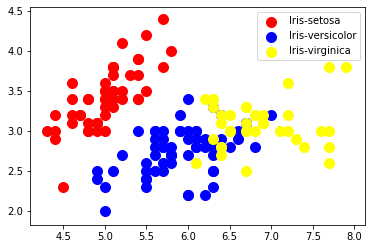

In [233]:
plt.scatter(X[labels==0,0], X[labels==0,1], s=100, c='red', label='Iris-setosa')
plt.scatter(X[labels==1,0], X[labels==1,1], s=100, c='blue', label='Iris-versicolor')
plt.scatter(X[labels==2,0], X[labels==2,1], s=100, c='yellow', label='Iris-virginica')
plt.legend()